# Assignment: Linear Models
## Do three questions.

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what? 

A model if linear if there is a coefficient that can be applied to all x's in the equation y = b * x-sub-j to make y and x's have a linear relationship. This relationship can then be represented by a straight line or a flat plane in two dimensions. It is linear in terms that y = b1 * x1 + b2 * x2 + b3 * x3 + ... bn * xn + c.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

The way you interpret the coefficient for a dummy/one-hot-encoded variable depends on whether you are keeping the intercept of the regression when you create the dummy variable. If you keep all the dummies, you can replicate one of the regressors from a combination of the others. If you decide to keep the intercept of the regression, the coefficient for the one-hot-encoded variable becomes the difference between the predicted outcome of the category and the baseline category. 

3. Can linear regression be used for classification? Explain why, or why not.

No, linear regression can't be used for classification. Linear regression deals more with prediciting continuous values, rather than discrete labelling. Using it for classificaion would most likely lead to bad probability estimates and predictions. 

4. What are signs that your linear model is over-fitting?

Your linear model is over-fitting is you use too many variables and exploiting too many unique features of the training data. Some effects and signs of this are a high variance in the predictions you get and a big difference between training and validation errors.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-colinearity can be explained using the two-stage least squares technique of isolating the independent variables that are highly correlated to find their individual effects easier. The first step is to regress xy on the other independent variables besides xk, which isolates y. The second step is to regress xk on the residuals of y instead of the original. This provides a more stable estimate of xk's effect on y than before.

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable `y` and your features/control/response/independent variables `x` into your analysis?

You can incorporate nonlinear relationships into your analysis by using polynomials, interaction terms, or log transformations. When you do these transformations of the x's, you get new variables that represent the nonlinear relationships.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The interpretation of the intercept it the predicted value of y when the independent variables, such as x, are zero. The slope coefficient for a variable represents the change in y for a change in that variable, when all other variable are held constant. The coefficient for a dummy/one-hot-encoded variable represent the difference between the given categoryand the baselin category. 

**Q2.** Load ./data/Q1_clean.csv. The data include

* Price per night
* Review Scores Rating: The average rating for the property
* Neighbourhood : The bourough of NYC. Note the space, or rename the variable.
* Property Type: The kind of dwelling
* Room Type: The kind of space being rented

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

1. Compute the average prices and scores by `Neighbourhood`; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood`.

Manhattan is the most expensive borough on average. 

In [2]:
# load data frame
qq = pd.read_csv("./hw data/Q1_clean.csv")
# print out head & columns
qq.head()
qq.columns

# rename the Neighbourhood column to get rid of the space at the end
qq.rename(columns={'Neighbourhood ' : 'Neighbourhood'}, inplace=True)
qq.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [3]:
# mean price grouped by neighbourhood
p = qq.groupby('Neighbourhood')['Price'].mean()

# mean scores grouped by neighbourhood
s = qq.groupby('Neighbourhood')['Review Scores Rating'].mean()

print("Price:\n" , p)
print("Scores:\n" , s)

Price:
 Neighbourhood
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64
Scores:
 Neighbourhood
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64


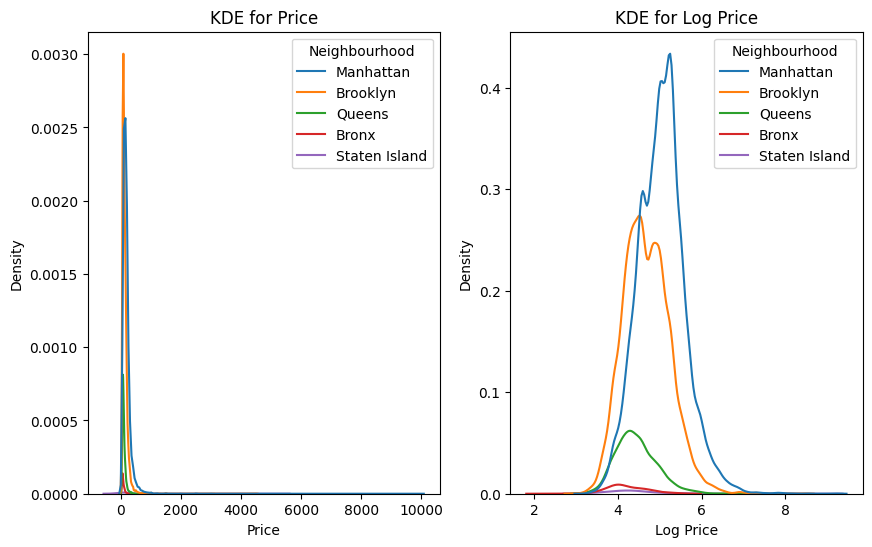

In [4]:
# kernel density plot of price & log price, grouped by neighbourhood
# add column in qq for log price
qq['Log Price'] = np.log(qq['Price'])

# create two subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

sns.kdeplot(data=qq, x='Price', hue='Neighbourhood', ax=ax1)
ax1.set_title("KDE for Price")

sns.kdeplot(data=qq, x='Log Price', hue='Neighbourhood', ax=ax2)
ax2.set_title("KDE for Log Price")

plt.show() 

2. Regress price on `Neighbourhood` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

The regression coefficients are the same as the mean prices calculated earlier. The coefficients in a regression of a continuous variables on one categorical variable are the difference in the continuous variable between the different categories of the categorical variable. 

In [5]:
# create dummy variables for Neighbourhood without intercept
X = pd.get_dummies(qq['Neighbourhood'], drop_first=True)
y = qq['Price']

# create model without intercept and fit 
r = LinearRegression(fit_intercept=False).fit(X, y)

# put coefficients into dataframe
results = pd.DataFrame({'variable':r.feature_names_in_, 'coefficient': r.coef_})

# print coefficients
print("Regression:\n" , results)

# reprint either table for comparison
print("\nPrice:\n" , p)

Regression:
         variable  coefficient
0       Brooklyn   127.747378
1      Manhattan   183.664286
2         Queens    96.857233
3  Staten Island   146.166667

Price:
 Neighbourhood
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

For the creation of the dummies, you have to set drop_first equal to False to include the reference. The intercept is now the mean price of the reference category. These coefficients represent the difference between the mean of the reference category and the mean of that category. To get the coefficients in part 2 from these new coefficients, just add these coefficients to the intercept of the dummy variable. 

In [6]:
# create dummy variables for Neighbourhood with intercept
X_f = pd.get_dummies(qq['Neighbourhood'], drop_first=False)
y = qq['Price']

# create model with intercept and fit 
r = LinearRegression(fit_intercept=True).fit(X_f, y)

# put coefficients into dataframe
results = pd.DataFrame({'variable':r.feature_names_in_, 'coefficient': r.coef_})

# print coefficients
print("Regression:\n" , results)

Regression:
         variable  coefficient
0          Bronx   -50.665915
1       Brooklyn     1.804966
2      Manhattan    57.721874
3         Queens   -29.085180
4  Staten Island    20.224254


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood`. What is the R^2 and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

The R^2 on the test set is 0.046. The RMSE on the test set is 140.92. The coefficient on `Review Scores Rating` is 1.21. The most expensive neighbourhood to rent in is Manhattan.

In [7]:
# create X and y from shorten dataframe
df = qq[['Price', 'Review Scores Rating', 'Neighbourhood']]

X = pd.get_dummies(df, columns=['Neighbourhood'], drop_first=False)
y = X.pop('Price')

# splitting sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# run regression on the test set  
m = LinearRegression().fit(X_train, y_train)

# making prediction 
y_pred = m.predict(X_test)

# computing r^2 on test set 
r2 = r2_score(y_test, y_pred)

# computing rmse on test set 
# rmse = sqrt(mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# get coefficients on RSR 
c = m.coef_[X.columns.get_loc('Review Scores Rating')]

# print everything
print("R^2: " , r2)
print("RMSE: " , rmse)
print("Coefficient: " , c)

# print out all neighbourhood coefficients to see which is the most expensive 
d = pd.DataFrame(m.coef_, index=X.columns, columns=['Coefficient'])
print(d)


R^2:  0.04592588381735074
RMSE:  140.91821103729345
Coefficient:  1.2118517840632497
                             Coefficient
Review Scores Rating            1.211852
Neighbourhood_Bronx           -40.524554
Neighbourhood_Brooklyn         11.031417
Neighbourhood_Manhattan        66.888999
Neighbourhood_Queens          -20.325981
Neighbourhood_Staten Island   -17.069881


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood` and `Property Type`. What is the R^2 and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

The R^2 for the test set is 0.054. The RMSE for the test set is 140.3. The coefficient on `Review Scores Rating` is 1.20. The most expensive kind of property you can rent is a Bungalow.

In [8]:
# create X and y from shorten dataframe
df = qq[['Price', 'Review Scores Rating', 'Neighbourhood', 'Property Type']]

X = pd.get_dummies(df, columns=['Neighbourhood', 'Property Type'], drop_first=False)
y = X.pop('Price')

# splitting sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# run regression on the test set  
m = LinearRegression().fit(X_train, y_train)

# making prediction 
y_pred = m.predict(X_test)

# computing r^2 on test set 
r2 = r2_score(y_test, y_pred)

# computing rmse on test set 
# rmse = sqrt(mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# get coefficients on RSR 
c = m.coef_[X.columns.get_loc('Review Scores Rating')]

# print everything
print("R^2: " , r2)
print("RMSE: " , rmse)
print("Coefficient: " , c)

# print out all  coefficients to see which is the most expensive 
d = pd.DataFrame(m.coef_, index=X.columns, columns=['Coefficient'])
print(d)

R^2:  0.0542427135512451
RMSE:  140.30266238276286
Coefficient:  1.2010106602298714
                               Coefficient
Review Scores Rating              1.201011
Neighbourhood_Bronx             -44.634163
Neighbourhood_Brooklyn           14.999540
Neighbourhood_Manhattan          76.371357
Neighbourhood_Queens            -17.803546
Neighbourhood_Staten Island     -28.933189
Property Type_Apartment          -3.591050
Property Type_Bed & Breakfast   -32.294971
Property Type_Boat               43.479369
Property Type_Bungalow           80.381390
Property Type_Cabin               8.798571
Property Type_Camper/RV         -17.408176
Property Type_Castle            -45.401599
Property Type_Chalet            -33.828770
Property Type_Condominium        58.316112
Property Type_Dorm              -45.868808
Property Type_House              31.120296
Property Type_Hut              -138.195535
Property Type_Lighthouse        -95.029781
Property Type_Loft               66.299974
Property Type

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

If the coefficient on  `Review Scores Rating` changes from part 4 to part 5, it means that `Property Type` is correlated with `Review Scores Rating` and `Price`. Multiple linear regression could possibly include indirect effects from omitted variables, like Property Type in part 4. After adding that omitted variable back in, the regression model can separately look at the effects of it. 

**Q4.** This question refers to the heart_hw.csv data. It contains three variables:

* y: Whether the individual survived for three years, coded 0 for death and 1 for survival
* age: Patient's age
* transplant: control for not receiving a transplant and treatment for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

In [9]:
# load data
hh = pd.read_csv("./hw data/heart_hw.csv")
# getting rid of extra index column
hh = hh[['age', 'transplant', 'y']]
hh.head()

,age,transplant,y
0,53,control,0
1,43,control,0
2,52,control,0
3,52,control,0
4,54,control,0


1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the average treatment effect.

The proportion of people who survive in the control group who do not receive a transplant is 0.118. The difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group is 0.23

In [10]:
# a 
# when transplant = control && y == 1 

# filter control group
c_group = hh[hh['transplant'] == 'control']
# num of survivors in the control group
sur = (c_group['y'] == 1).sum()
# total num of ppl in control group
total = len(c_group)

# calculate proportions
prop = sur / total
print(prop)

0.11764705882352941


In [11]:
# b 
# proportion of survive in treatment group 
t_group = hh[hh['transplant'] == 'treatment']
surv = (t_group['y'] == 1).sum()
totalt = len(t_group)
propt = surv / totalt

# proportion of survive in control group
prop 

# difference
d = propt - prop
print(d)

0.23017902813299232


2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

The intercept of the regression is 0.117, which is very similar to the proportion of people who survive in the control group, of 0.118. The coefficient on transplant is the same as the different in the proportion of people who survive in the control group and the proportion of people who survive in the treatment group. The intercept of the regression represents the proportion of survivors in the control group because it is the baseline, and when transplant = 0. The coefficient on transplant represents the difference in the number of people who survive in each group. 

In [12]:
# replace transplant values w/ numbers -> control = 0 and treatment = 1
hh['transplantnum'] = hh['transplant'].replace({'control': 0, 'treatment': 1})

# defining X and y
X = hh['transplantnum']
y = hh['y']

# add constant of ones
X = np.c_[np.ones(X.shape[0]), X]

# regress y on transplant
m = LinearRegression(fit_intercept=False).fit(X, y)

# get coefficients
i, coef = m.coef_

print("Intercept: " , i)
print("Coefficient: " , coef)

Intercept:  0.11764705882352922
Coefficient:  0.2301790281329926


C:\Users\ilian\AppData\Local\Temp\ipykernel_21732\2756676286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hh['transplantnum'] = hh['transplant'].replace({'control': 0, 'treatment': 1})


3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?

The intercept changes to 0.702. The intercept now represents the proportion of survivors in the control group who have an age of 0. 

In [13]:
# replace transplant values w/ numbers -> control = 0 and treatment = 1
hh['transplantnum'] = hh['transplant'].replace({'control': 0, 'treatment': 1})

# defining X and y
X = hh[['transplantnum', 'age']]
y = hh['y']

# add constant of ones
X = np.c_[np.ones(X.shape[0]), X]

# regress y on transplant
m = LinearRegression(fit_intercept=False).fit(X, y)

# get coefficients
i, coef_t, coef_a = m.coef_

print("Intercept: " , i)
print("Coefficient of transplant: " , coef_t)
print("Coefficient of age: " , coef_a)

Intercept:  0.7019569721740964
Coefficient of transplant:  0.26470168650367526
Coefficient of age:  -0.013607217160218676


C:\Users\ilian\AppData\Local\Temp\ipykernel_21732\3055558319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hh['transplantnum'] = hh['transplant'].replace({'control': 0, 'treatment': 1})


4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.

The plot has quadratic functions instead of linear functions. The control group has a lower overall predicted survival probability than the transplant group. However, the transplant group has a much larger distribution of predicted survival probability than the control group. 

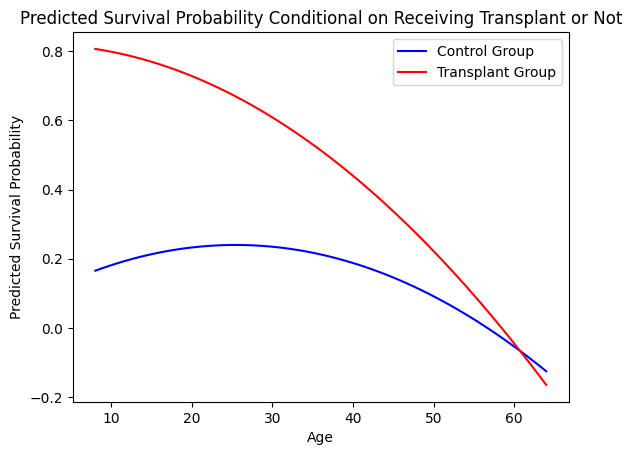

In [14]:
# create quadratic term for age 
hh['age2'] = hh['age'] ** 2
hh['at interaction'] = hh['age'] * hh['transplantnum']

# define X and y 
X = hh[['age', 'age2', 'transplantnum', 'at interaction']]
y = hh['y']

# splitting sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# run regression on the test set  
m = LinearRegression().fit(X_train, y_train)

# making prediction 
y_pred = m.predict(X_test)

# computing r^2 on test set 
r2 = r2_score(y_test, y_pred)

# computing rmse on test set 
# rmse = sqrt(mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# predict survival probability by age w dataframe where transplant is constant 
a = np.linspace(hh['age'].min(), hh['age'].max(), 100)
df_control = pd.DataFrame({'age': a, 'age2': a ** 2, 'transplantnum': 0, 'at interaction': a * 0})

# predicting control group 
pred_control = m.predict(df_control)

# dataframe where transplant is treatment 
df_treatment = pd.DataFrame({'age': a, 'age2': a ** 2, 'transplantnum': 1, 'at interaction': a * 1})

# predicting treatment group 
pred_treatment = m.predict(df_treatment)

# plotting results 
plt.plot(a, pred_control, label='Control Group', color='blue')
plt.plot(a, pred_treatment, label='Transplant Group', color='red')
plt.xlabel("Age")
plt.ylabel("Predicted Survival Probability")
plt.title("Predicted Survival Probability Conditional on Receiving Transplant or Not")
plt.legend()
plt.show()

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

My concerns about how it is built is that it is not trained on a large enough dataset to be super accurate. How it is trained affects how accurate the model is. 
My concerns about how it is deployed is that it will be trusted completely. There is always a chance that these models are incorrect or have some sort of error associated with them. If they are trained well with large datasets it is reasonable to trust them, however sometimes this is not the case. If they are blindly trusted, someone who needs the transplant and has a high chance of surviving might not get it because the model predicts them as not being a good candidate. The same could happen in the other direction, if someone receives a transplant but has some underlying medical conditions that could affect the chances of them surviving. 